<center>MIMIC-CXR-JPEG disease exploration </center>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
csv_path = r"E:\MIMIC-CXR-JPED\all_train_data_4_12_AP_PA.csv"
CHEXPERT_LABELS = [
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 "Support Devices"
]

In [2]:
MIMIC_CXR_JPED = pd.read_csv(csv_path)
size_of_dataset = len(MIMIC_CXR_JPED)
MIMIC_CXR_JPED.head()

,dicom_id,study_id,subject_id,split,original_14_labels,strategy1_14_labels,ViewPosition,project_3_classes_14_labels,image_file_path,BiomedClip_img_tensor_path,Clip_img_tensor_path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",PA,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s50414267/...,/public_bme/data/lds//p10/p10000032/s50414267/...,/public_bme/data/lds//p10/p10000032/s50414267/...
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",PA,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s53189527/...,/public_bme/data/lds//p10/p10000032/s53189527/...,/public_bme/data/lds//p10/p10000032/s53189527/...
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",AP,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s53911762/...,/public_bme/data/lds//p10/p10000032/s53911762/...,/public_bme/data/lds//p10/p10000032/s53911762/...
3,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,53911762,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",AP,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s53911762/...,/public_bme/data/lds//p10/p10000032/s53911762/...,/public_bme/data/lds//p10/p10000032/s53911762/...
4,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,56699142,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",AP,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s56699142/...,/public_bme/data/lds//p10/p10000032/s56699142/...,/public_bme/data/lds//p10/p10000032/s56699142/...


In [3]:
dataset_size = len(MIMIC_CXR_JPED)
print(dataset_size)

207612


In [4]:
labels = MIMIC_CXR_JPED["project_3_classes_14_labels"]
labels = np.array(labels)
labels
temp = [0] * 14


def count_disease(labels):
  for instance in labels:
    instance_l = ast.literal_eval(instance)
    for index, disease in enumerate(instance_l):
      # print(disease)
      temp[index] += int(disease)
  return temp   
count_disease_list = count_disease(labels)
   
# temp = count_disease(labels)

In [5]:
count_disease_list

disease_statistic = {}
for disease, count in zip(CHEXPERT_LABELS, count_disease_list):
  disease_statistic[disease] = count

In [6]:
labels_distribution = {}
for key, value in disease_statistic.items():
  disease = key
  positive = value
  negative = size_of_dataset - value
  labels_distribution [disease] = [positive, negative] 
labels_distribution['diagnosis'] = ["positive", "negative"]
df = pd.DataFrame(labels_distribution,  )

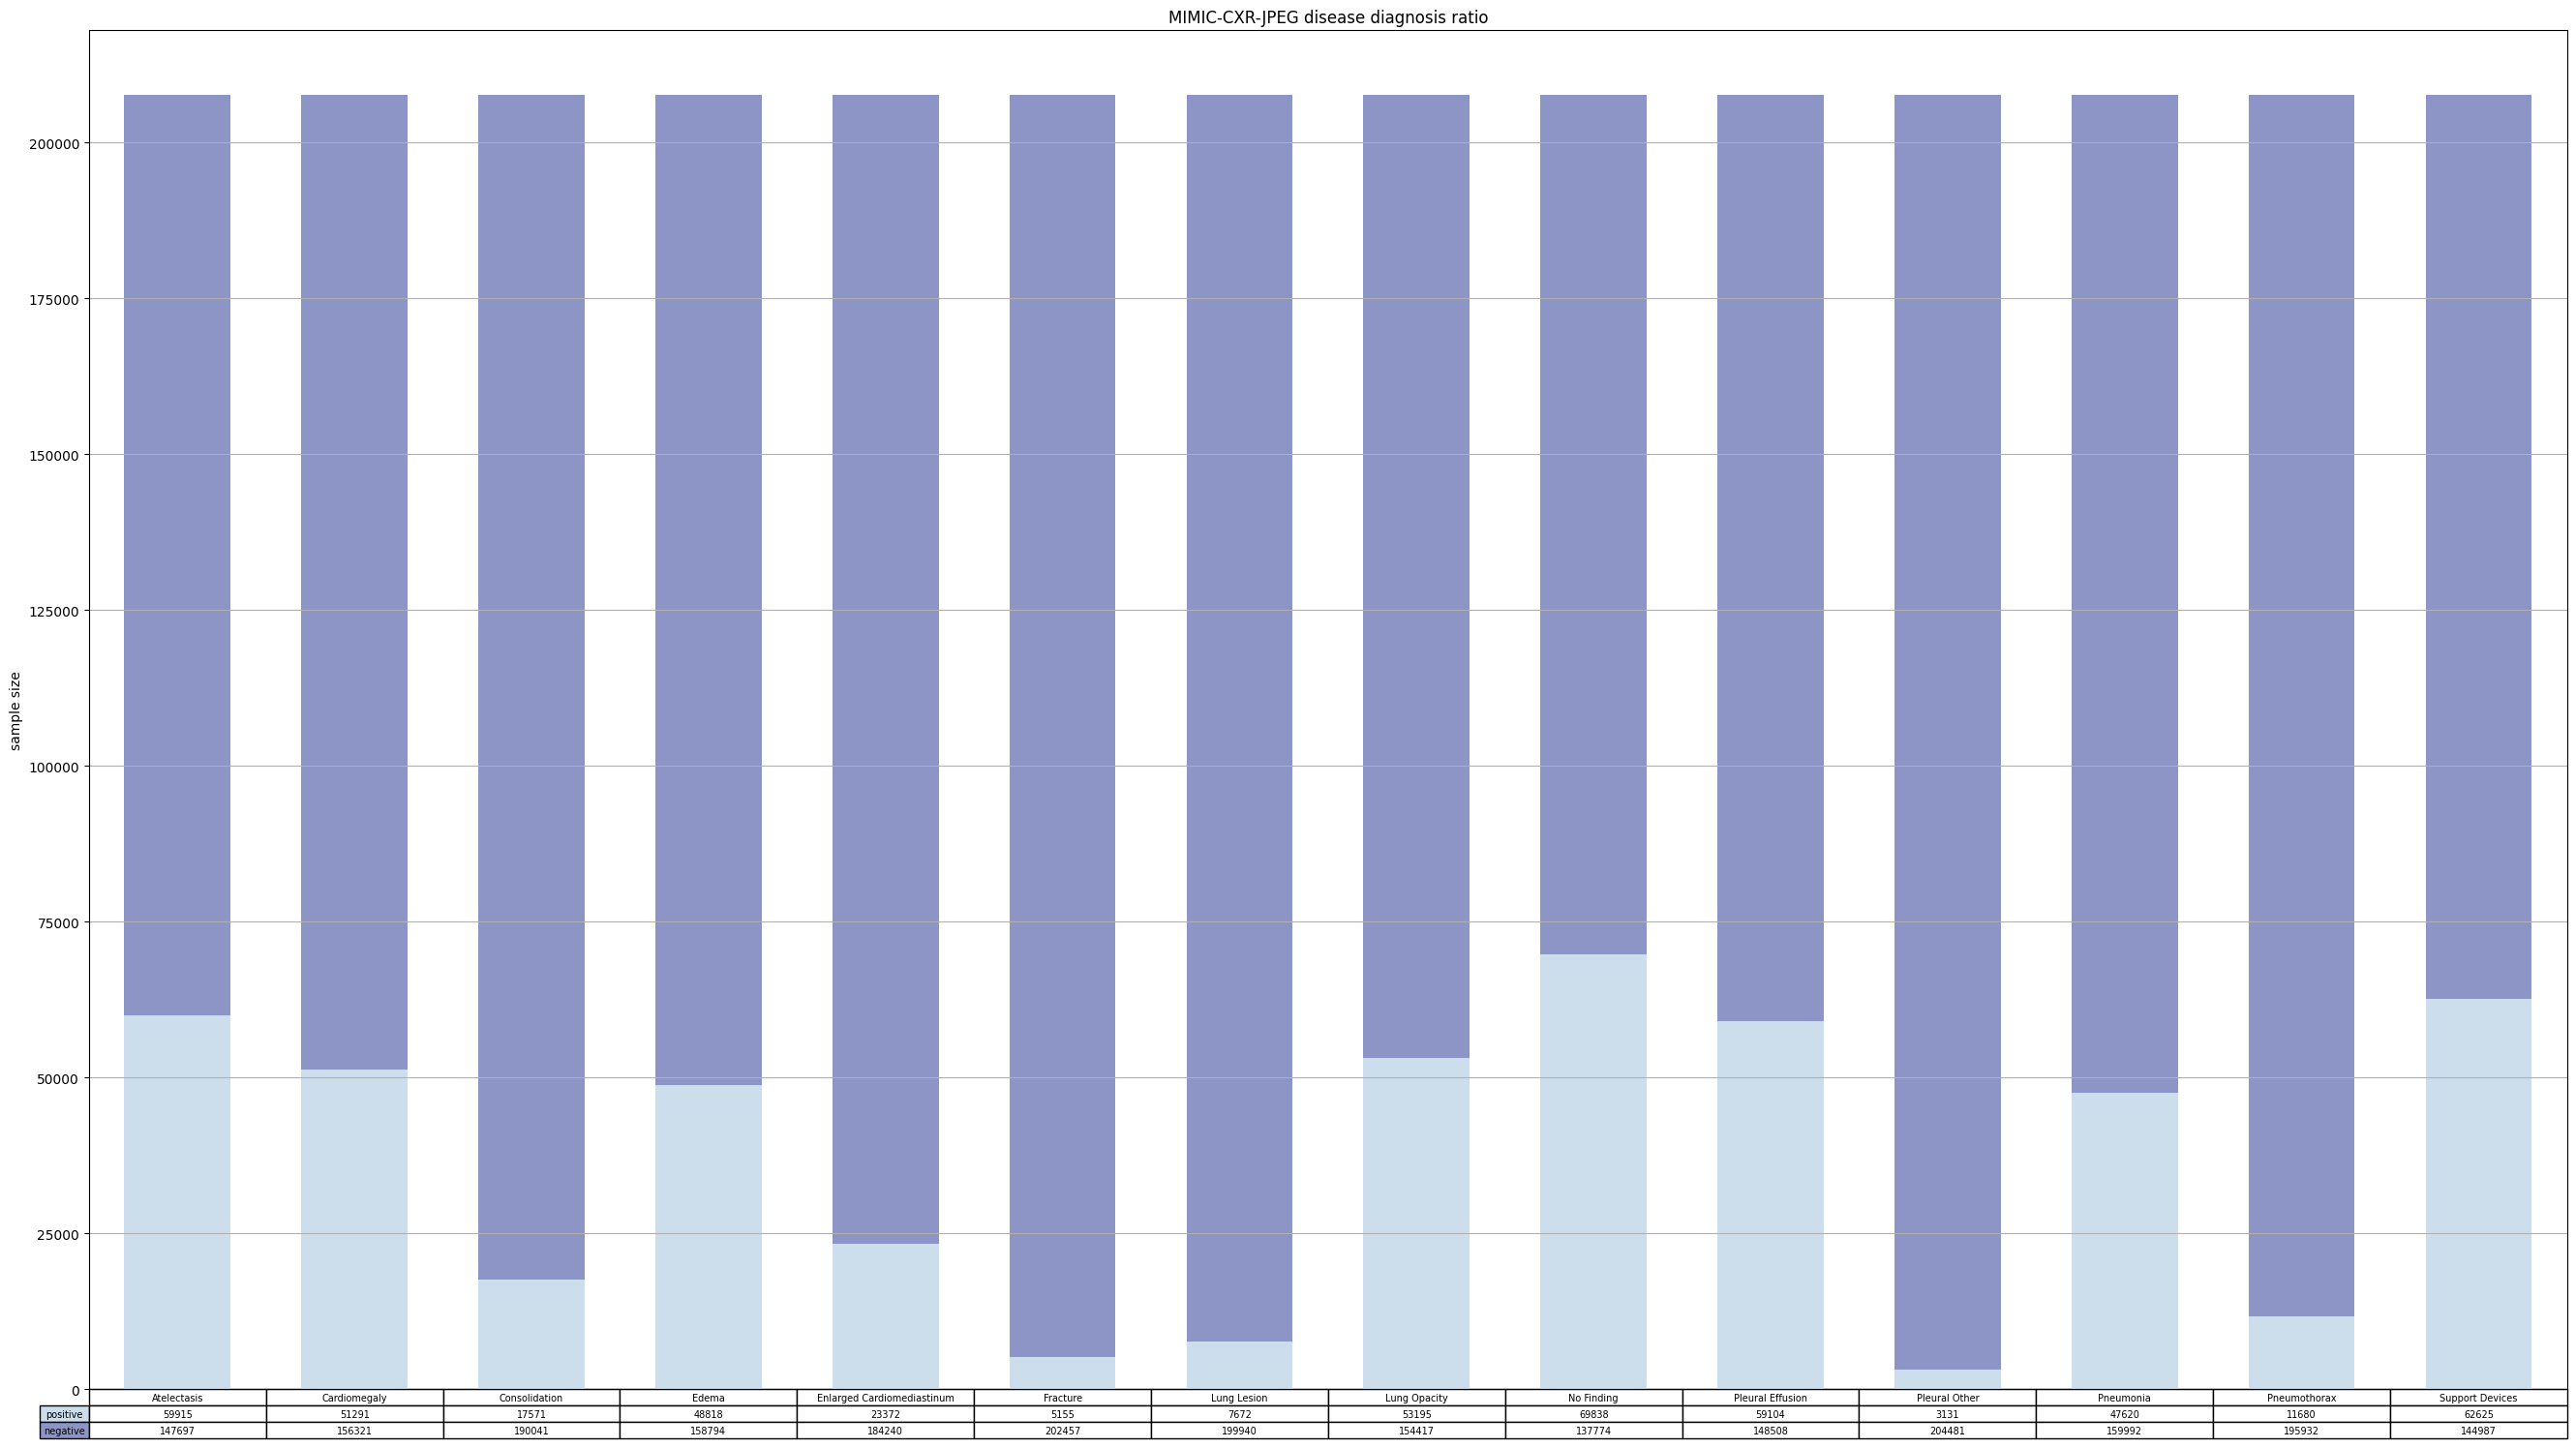

In [11]:
values = np.arange(0, 2500, 500)
value_increment = 1000
plt.figure(figsize=(16*2, 9*2)) 
plt.grid()
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(df)))
# print(colors)
n_rows = len(df)
# print(n_rows)
index = np.arange(len(df.columns)-1) + 0
# print(f"index: {index}")
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns)-1)
# print(y_offset)
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    # print(f"df.iloc[row, :]: \n{df.iloc[row, :-1]}")
    # print(f"bar_width: {bar_width}"
    tem = y_offset
    plt.bar(index, df.iloc[row, :-1], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[row, :-1]
    # print(y_offset)
    cell_text.append([int(x) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# print(type(cell_text))
# print(cell_text)
# cell_text.reverse()
cell_text = np.array(cell_text)
cell_text[-1] = cell_text[-1] - cell_text[0]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=df['diagnosis'],
                      rowColours=colors,
                      colLabels=df.columns,
                      loc='bottom',
                      rowLoc = "center", 
                      cellLoc = "center")

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

# Add label and title
plt.ylabel(f"sample size")
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.xlim(-0.5, 13.5)
plt.title('MIMIC-CXR-JPEG disease diagnosis ratio')
plt.savefig("../../imgs/MIMIC-CXR-JPEG_Diagnosis_Ratio.png")
# Dislay the chart
plt.show()


---
# 6/12

更新MIMIC-CXR数据集， 跟NIH 和 CheXpert数据集的逻辑一致

In [1]:
import pandas as pd
import ast

In [16]:
MIMIC_CXR_JPED_APPA_training = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/project_using_data/all_train_data_4_12_AP_PA.csv"
MIMIC_CXR_JPED_APPA_testing = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/project_using_data/all_test_data_4_12_AP_PA.csv"


CHEXPERT_LABELS = [
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 "Support Devices"
]

MIMIC_training = pd.read_csv(MIMIC_CXR_JPED_APPA_training)
MIMIC_testing = pd.read_csv(MIMIC_CXR_JPED_APPA_testing)
print(f"the size of MIMIC_training: {len(MIMIC_training)}")
print(f"the size of MIMIC_testing: {len(MIMIC_testing)}")
print(f"the columns in the df: \n{MIMIC_training.columns.tolist()}")

the size of MIMIC_training: 207612
the size of MIMIC_testing: 2893
the columns in the df: 
['dicom_id', 'study_id', 'subject_id', 'split', 'original_14_labels', 'strategy1_14_labels', 'ViewPosition', 'project_3_classes_14_labels', 'image_file_path', 'BiomedClip_img_tensor_path', 'Clip_img_tensor_path']


#### training dataset

In [55]:
MIMIC_training_update = MIMIC_training[["image_file_path", "strategy1_14_labels"]]

In [56]:
# 定义转换函数
def list_to_labels(labels_list):
    labels_dict = {label: 0 for label in CHEXPERT_LABELS}

    for index, label in enumerate(ast.literal_eval(labels_list)):
      if label:
        labels_dict[CHEXPERT_LABELS[index]] = label
    return pd.Series(labels_dict)

# 创建一个包含 14 个列的 DataFrame
labels_df = MIMIC_training_update['strategy1_14_labels'].apply(list_to_labels)

# 合并两个 DataFrame
MIMIC_training_update = pd.concat([MIMIC_training_update, labels_df], axis=1)

# 删除原始的 strategy1_14_labels 列
MIMIC_training_update.drop(columns=['strategy1_14_labels'], inplace=True)

In [57]:
MIMIC_training_update.to_csv("/public_bme/data/lds/CXR_datasets/MIMIC/training.csv", index=False)

### testing dataset

In [61]:
MIMIC_testing_update = MIMIC_testing[["image_file_path", "strategy1_14_labels"]]

# 定义转换函数
def list_to_labels(labels_list):
    labels_dict = {label: 0 for label in CHEXPERT_LABELS}

    for index, label in enumerate(ast.literal_eval(labels_list)):
      if label:
        labels_dict[CHEXPERT_LABELS[index]] = label
    return pd.Series(labels_dict)

# 创建一个包含 14 个列的 DataFrame
labels_df = MIMIC_testing_update['strategy1_14_labels'].apply(list_to_labels)

# 合并两个 DataFrame
MIMIC_testing_update = pd.concat([MIMIC_testing_update, labels_df], axis=1)

# 删除原始的 strategy1_14_labels 列
MIMIC_testing_update.drop(columns=['strategy1_14_labels'], inplace=True)

MIMIC_testing_update.to_csv("/public_bme/data/lds/CXR_datasets/MIMIC/testing.csv", index=False)

In [63]:
pd.read_csv("/public_bme/data/lds/CXR_datasets/MIMIC/testing.csv")

,image_file_path,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,/public_bme/data/lds//p10/p10046166/s50051329/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/public_bme/data/lds//p10/p10046166/s51738740/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,/public_bme/data/lds//p10/p10046166/s53492798/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,/public_bme/data/lds//p10/p10046166/s53492798/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,/public_bme/data/lds//p10/p10046166/s56173345/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,/public_bme/data/lds//p18/p18615099/s59480739/...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2889,/public_bme/data/lds//p18/p18615099/s59612133/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2890,/public_bme/data/lds//p18/p18659631/s57233393/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2891,/public_bme/data/lds//p18/p18659631/s59284918/...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


---
### AP PA analysis


In [17]:
MIMIC_training["ViewPosition"]

0         PA
1         PA
2         AP
3         AP
4         AP
          ..
207607    AP
207608    AP
207609    AP
207610    AP
207611    PA
Name: ViewPosition, Length: 207612, dtype: object

In [35]:
AP = MIMIC_training[MIMIC_training["ViewPosition"] == "AP"]
PA = MIMIC_training[MIMIC_training["ViewPosition"] == "PA"]
print(f"the ratio of AP/PA: {len(AP)/len(PA)} : 1")
AP_strategy1_14_labels = AP["strategy1_14_labels"]
PA_strategy1_14_labels = PA["strategy1_14_labels"]
AP_state = []
PA_state = []
for i in AP_strategy1_14_labels.values:
  AP_state.append(ast.literal_eval(i))
for i in PA_strategy1_14_labels.values:
  PA_state.append(ast.literal_eval(i))
  


the ratio of AP/PA: 1.5215521952996902 : 1


In [39]:
np.array(AP_state).sum(axis = 0)

array([39900., 32150.,  8230., 31995.,  5168.,  2433.,  3010., 34630.,
       26752., 38576.,   880.,  9626.,  7676., 56452.])

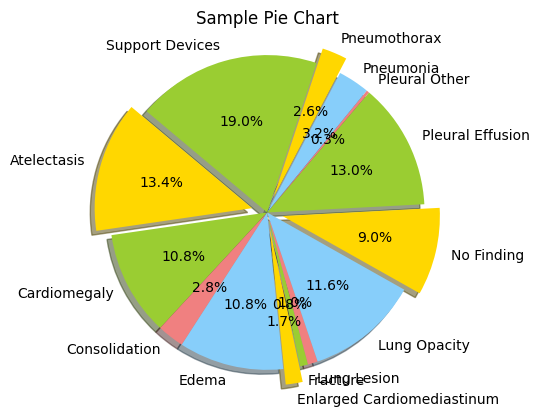

In [50]:
import matplotlib.pyplot as plt

# 示例数据
labels = CHEXPERT_LABELS
sizes = np.array(AP_state).sum(axis = 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen']
explode = (0.1, 0, 0, 0,0.1, 0, 0, 0,0.1, 0, 0, 0,0.1, 0,)  # 将第一个切片 "爆炸" 出来

# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # 确保饼图是圆形的
plt.title('Sample Pie Chart')
plt.show()

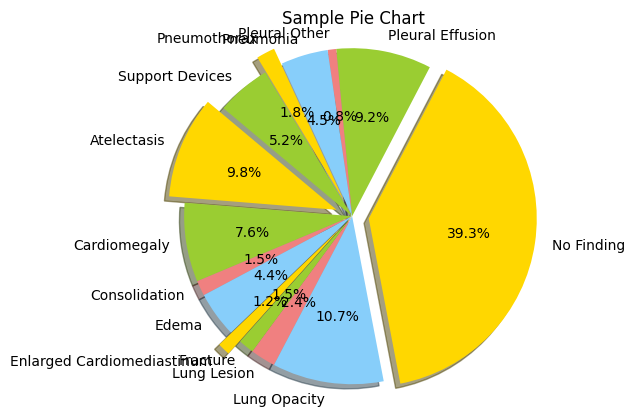

In [51]:
import matplotlib.pyplot as plt

# 示例数据
labels = CHEXPERT_LABELS
sizes = np.array(PA_state).sum(axis = 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen']
explode = (0.1, 0, 0, 0,0.1, 0, 0, 0,0.1, 0, 0, 0,0.1, 0,)  # 将第一个切片 "爆炸" 出来

# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # 确保饼图是圆形的
plt.title('Sample Pie Chart')
plt.show()

疾病在数据AP/PA上的分布存在明细那个差异